# Music and Mental Health Analysis

## 1. Introduction

**Objective:** Explore connections between music preferences and mental health.

**Questions:**
1. What are the genres associated with the highest mental health issues?
2. How much impact do hours of music listening have on anxiety, depression, and insomnia levels?
3. Can we accurately predict the anxiety, depression, and insomnia levels based on their music taste or frequency using machine learning models?

Each question is divided into 3 sub-questions relating to anxiety, depression and insomnia

## 2. Selection of Datasets

**DataSet:** 'Music & Mental Health Survey Results' from Kaggle.

**Link:** [Music & Mental Health Survey Results](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)

**Data:**
- Collected between July 27, 2022, and November 8, 2022, via Google Form.
- Publicly available under CC0 Public Domain license.
- Three blocks:
  1. Musical background and preferences
  2. Listening habits
  3. Mental health indicators.

**Rationale:** Despite discussions on self-report accuracy, the dataset aligns with this project's criteria.

## 3. Methodologies

### 3.1 Data Import and Cleaning

- Use Pandas to:
  - Filter dataset.
  - Apply `means()` method for average anxiety, depression, and insomnia levels.
- Use Matplotlib for visualization.
- Done for all questions.

### 3.2 Machine Learning Models

- For Q3, "Can we accurately predict the anxiety, depression, and insomnia level based on their music taste or frequency using machine learning models?"
- Utilize sklearn models:
  - DecisionTreeClassifier.
  - DecisionTreeRegressor.
- Dataset Division:
  - Train (80%) and test (20%) subsets.
  - Input and output sets.
    - Input: ['Fav genre'] or ['Hours per day']
    - Output: ['Anxiety', 'Depression', 'Insomnia']
- Model Training:
  - Train subset used for model training with sklearn machine learning models.
  - Test set evaluates prediction accuracy.
- Evaluation Metrics:
  - DecisionTreeClassifier: accuracy score (0 to 1).
  - DecisionTreeRegressor: mean squared error.

**Objective:** Assess the practicality of using music preferences as predictors for understanding and predicting mental well-being.


## 4. Result 
### Q1: What are the genres associated with the highest mental health issues?
### Helper Functions
Plot the sorted data relating to favorite genre and mental health levels

In [1]:
import matplotlib.pyplot as plt
def plot_genre_data(sorted_data, xLabel, yLabel):
    plt.figure(figsize=(12, 6))
    sorted_data.plot(kind='bar', color='skyblue')
    title = yLabel + " by " + xLabel
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.xticks(rotation=45, ha='right')
    plt.show()

## Q1.1: What are the genres associated with the highest anxiety levels?

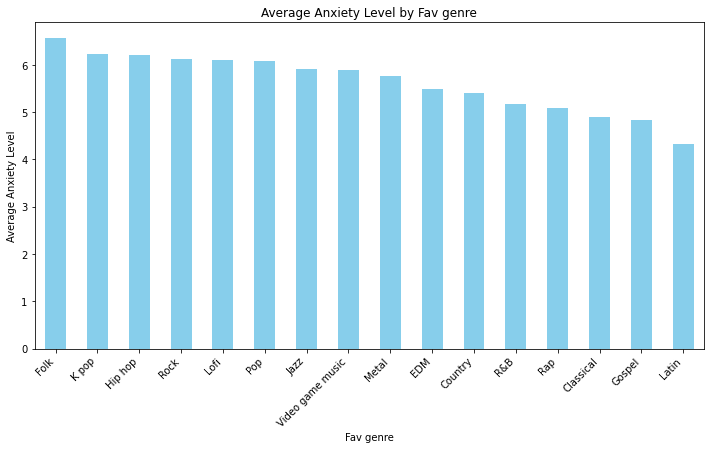

In [2]:
import pandas as pd

data = pd.read_csv('mxmh_survey_results.csv')

# Which genre has people with higher anxiety level in average?

genre_anxiety_data = data.groupby('Fav genre')['Anxiety'].mean()
sorted_data = genre_anxiety_data.sort_values(ascending=False)
plot_genre_data(sorted_data, 'Fav genre', 'Average Anxiety Level')

## Q1.2: What are the genres associated with the highest depression levels?

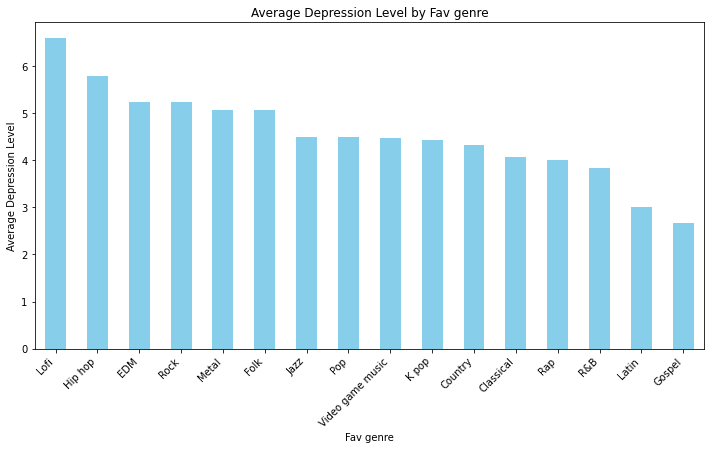

In [3]:
# Which genre has people with higher depression level in average?
import pandas as pd

data = pd.read_csv('mxmh_survey_results.csv')

genre_anxiety_data = data.groupby('Fav genre')['Depression'].mean()
sorted_data = genre_anxiety_data.sort_values(ascending=False)
plot_genre_data(sorted_data, 'Fav genre', 'Average Depression Level')

## Q1.3 What are the genres associated with the highest Insomnia levels?

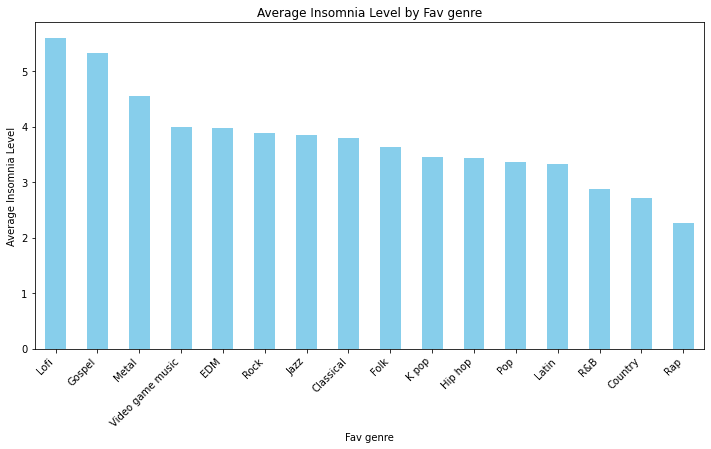

In [4]:
# Which genre has people with higher insomnia level in average?

import pandas as pd

data = pd.read_csv('mxmh_survey_results.csv')

genre_anxiety_data = data.groupby('Fav genre')['Insomnia'].mean()
sorted_data = genre_anxiety_data.sort_values(ascending=False)
plot_genre_data(sorted_data, 'Fav genre', 'Average Insomnia Level')

## Q2: How much impact do hours of music listening have on anxiety, depression, and insomnia levels?
### Helper Function


In [5]:
import matplotlib.pyplot as plt
def plot_hours_per_day(sorted_data, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_data.index, sorted_data.values, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ylabel + ' x ' + xlabel)
    plt.show()

## Q2.1 How much impact do hours of music listening have on anxiety levels?

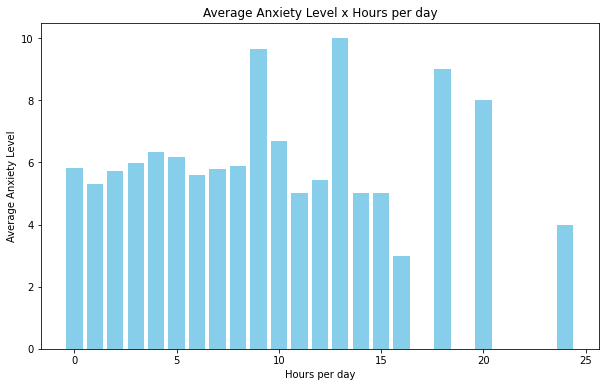

In [6]:
# Does the hours spent listening to music affect the anxiety level

data['Hour Bin'] = data['Hours per day'].round()

genre_anxiety_data = data.groupby('Hour Bin')['Anxiety'].mean()
sorted_data = genre_anxiety_data.sort_values(ascending=False)

plot_hours_per_day(sorted_data, 'Hours per day', 'Average Anxiety Level')

## Q2.2 How much impact do hours of music listening have on depression levels?

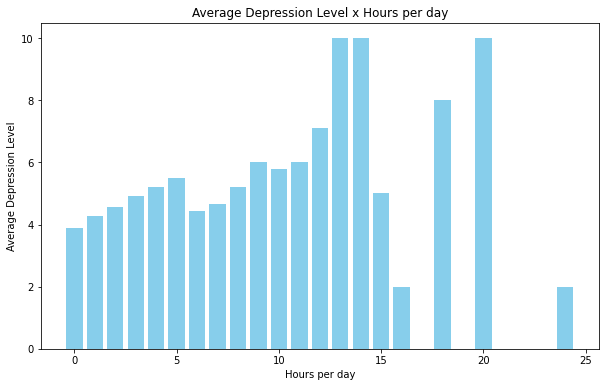

In [7]:
# Does the hours spent listening to music affect the depression level

data['Hour Bin'] = data['Hours per day'].round()

genre_anxiety_data = data.groupby('Hour Bin')['Depression'].mean()
sorted_data = genre_anxiety_data.sort_values(ascending=False)
plot_hours_per_day(sorted_data, 'Hours per day', 'Average Depression Level')

## Q2.3 How much impact do hours of music listening have on insomnia levels?

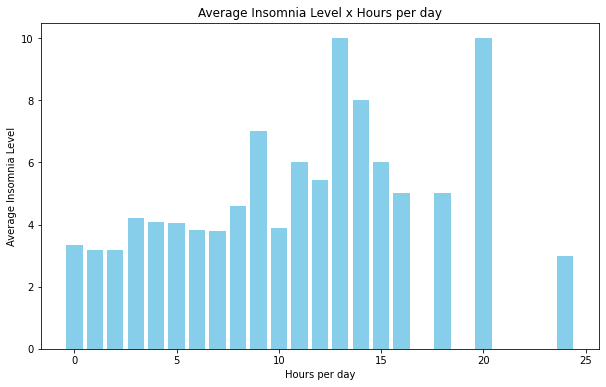

In [8]:
# Does the hours spent listening to music affect the insomnia level

data['Hour Bin'] = data['Hours per day'].round()

genre_anxiety_data = data.groupby('Hour Bin')['Insomnia'].mean()
sorted_data = genre_anxiety_data.sort_values(ascending=False)
plot_hours_per_day(sorted_data, 'Hours per day', 'Average Insomnia Level')

## 3. Can we accurately predict the anxiety, depression, and insomnia levels based on their music taste or frequency using machine learning models?

#### Helper Functions

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def create_train_model(input_set, output_set):
    # Extract features (X) and target variable (y)
    X = input_set
    y = output_set
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Training the model with Decision Tree algorithm for regression
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error: ", mse)
    return [predictions, y_test]

In [10]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence

def plot_model(predictions, y, name):
    # Scatter plot of actual vs predicted values
    plt.scatter(y_test, predictions)
    plt.xlabel("Actual " + name)
    plt.ylabel("Predicted " + name)
    plt.title("Actual vs Predicted " + name)
    plt.show()

## Q3.1 Can we accurately predict the anxiety level based on their frequency of music listening?

Mean Squared Error:  7.927178846908276


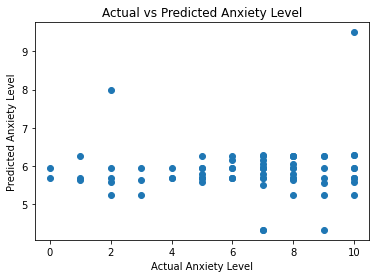

In [11]:
data = pd.read_csv('mxmh_survey_results.csv')
# Extract features (X) and target variable (y)
X = data[['Hours per day']]
y = data['Anxiety']

model, y_test = create_train_model(X, y)
plot_model(model, y_test, 'Anxiety Level')

## Q3.2 Can we accurately predict the depression level based on their frequency of music listening?

Mean Squared Error:  9.884870854441782


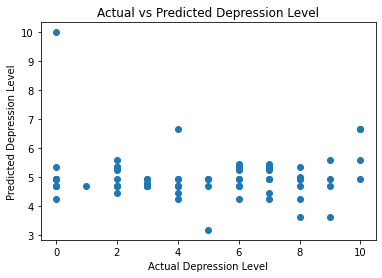

In [12]:
data = pd.read_csv('mxmh_survey_results.csv')
X = data[['Hours per day']]
y = data['Depression']

model, y_test = create_train_model(X, y)
plot_model(model, y_test, 'Depression Level')

## Q3.3 Can we accurately predict the insomnia level based on their frequency of music listening?

Mean Squared Error:  10.33583624994101


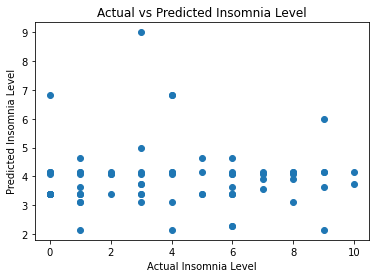

In [13]:
data = pd.read_csv('mxmh_survey_results.csv')
# Extract features (X) and target variable (y)
X = data[['Hours per day']]
y = data['Insomnia']

model, y_test = create_train_model(X, y)
plot_model(model, y_test, 'Insomnia Level')

## Q3.4 Can we accurately predict the anxiety level based on one's favorite genre of music?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mean Squared Error:  8.056713371052219


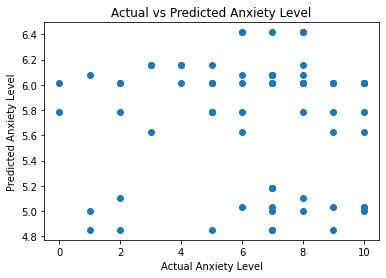

In [14]:
data = pd.read_csv('mxmh_survey_results.csv')
# input set
X = data[['Fav genre']]
# output set
y = data['Anxiety']

label_encoder = LabelEncoder()
X['Fav genre'] = label_encoder.fit_transform(X['Fav genre'])

model, y_test = create_train_model(X, y)
plot_model(model, y_test, 'Anxiety Level')

## Q3.5 Can we accurately predict the depression level based on one's favorite genre of music?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Mean Squared Error:  9.107010534791192


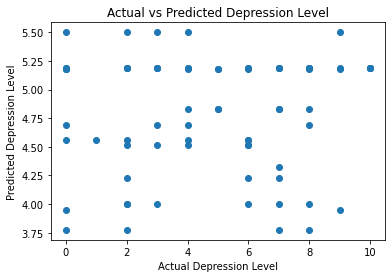

In [15]:
# Can we accurately predict the anxiety level based on Fav genre?
import pandas as pd

data = pd.read_csv('mxmh_survey_results.csv')
# input set
X = data[['Fav genre']]
# output set
y = data['Depression']

label_encoder = LabelEncoder()
X['Fav genre'] = label_encoder.fit_transform(X['Fav genre'])

model, y_test = create_train_model(X, y)
plot_model(model, y_test, 'Depression Level')

## Q3.6 Can we accurately predict the insomnia level based on one's favorite genre of music?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Mean Squared Error:  9.782376453165558


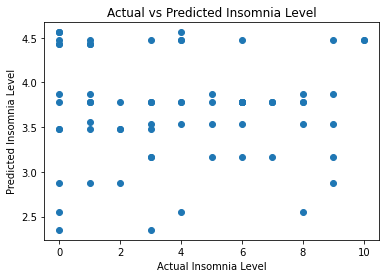

In [16]:
# Can we accurately predict the anxiety level based on Fav genre?
import pandas as pd

data = pd.read_csv('mxmh_survey_results.csv')
# input set
X = data[['Fav genre']]
# output set
y = data['Insomnia']

label_encoder = LabelEncoder()
X['Fav genre'] = label_encoder.fit_transform(X['Fav genre'])

model, y_test = create_train_model(X, y)
plot_model(model, y_test, 'Insomnia Level')